In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//EDC_EYDC_MDC_regen"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario6_MDC-9K_minmax

dataset = np.load(workdir + "//MDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//MDC9K_dataset_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 1


In [6]:
x.shape

(8727, 23538)

In [7]:
training_image_array.shape

(7855, 23538)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
# The proportion of feature selection
perc = 30

In [14]:
# In[10]:


# Feature selection using f-regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, SelectFdr, SelectPercentile, SelectFromModel

# selection the percentile feature

Starttime = datetime.now()
print(Starttime)

sel = SelectPercentile(f_regression, percentile=perc).fit(train_X, train_y)
Endtime = datetime.now()
print(Endtime)
train_X = sel.transform(train_X)
train_X.shape

test_X = sel.transform(test_X)
test_X.shape
# In[11]:


2020-11-22 22:49:54.611732


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


2020-11-22 22:49:55.473461


(872, 7061)

In [15]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 7061)
7855 train samples
872 test samples


In [16]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [17]:
import matplotlib
from matplotlib import pyplot as plt

In [18]:
y_lin

array([ 1.64190744,  1.98596878,  1.78658975,  1.70110718,  1.59301728,
        1.96408693,  1.5946689 ,  1.59245244,  1.98565358,  1.95444473,
        1.86852105,  1.99923634,  1.98730728,  1.98044882,  1.95283247,
        0.25311052,  1.94362026,  0.39435971,  1.7010862 ,  1.91817901,
        1.91319952,  1.98478073,  1.97362909,  1.98730728, -0.43530655,
        1.59200397,  1.9829914 ,  0.238779  ,  1.92587282,  0.23986839,
        1.96242924,  0.71945083,  1.98929937,  1.98932739,  1.70733111,
        0.38316405,  2.00963011,  1.97114366,  1.83018789,  1.64358583,
        1.95490376,  1.9758458 ,  1.97448951,  1.69589765,  1.98107009,
        1.96674927,  1.97233369,  1.64474573,  1.99003251,  1.98372155,
       -0.66920966,  1.99902571,  1.97307187, -0.52126354,  1.96787842,
        1.59151134, -0.24171109,  2.00783541,  1.99622019,  1.866701  ,
        1.98250656,  1.97360349,  1.83033164,  0.23398921,  1.86365805,
        1.96225579,  1.56652756,  1.97395525,  1.9596978 ,  1.56

In [19]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//MDC9K_regen_feature_selection//SVR"
joblib.dump(svr_lin, workdir + '//MDC9K_SVR_model_fs_30.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//MDC9K_regen_feature_selection//SVR//MDC9K_SVR_model_fs_30.pkl']

In [20]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [21]:
c.to_csv(workdir + '//MDC9K_SVR_pred_obs_table_fs30.csv')

In [22]:
c

,Predicted,Test
0,1.641907,0.577696
1,1.985969,2.079442
2,1.786590,0.483850
3,1.701107,2.079442
4,1.593017,-0.941620
...,...,...
867,1.602168,1.328457
868,1.962056,1.700243
869,1.967506,1.767344
870,0.269442,-2.164246


In [23]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.27854583686539275, intercept=1.3040919039721084, rvalue=0.7901440730912754, pvalue=3.7675825335748726e-187, stderr=0.007325467922760596)

In [24]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.34237972060766764


In [25]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.5455794524502022


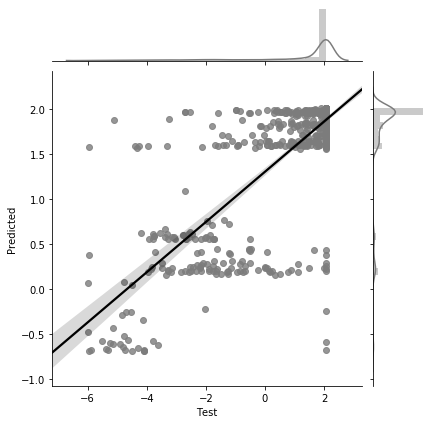

In [26]:
workdir = "D://DrugResponsivenessGuideline_log//Figures//Backbone//MDC-9K_regen_feature_selection"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MDC9K_SVR_fs30.png', dpi=300)